# HCAIM Hackathon Challenge 2: Starter Notebook (Slim version)

This notebook is designed to introduce participants to the HCAIM Hackathon Challenge 2. Please read the supporting documentation before beginning the notebook.

To begin, first make a copy of this notebook in Google Drive (this ensures your changes wil be saved). Then you can run the copy in Colab to get started.

Lets get started!

First, please enter your team name below. This will be used for submission and will be displayed on the leaderboard.

In [ ]:
team_name = input("Enter your assigned team name: ")
print(f"Welcome to the HCAIM hackathon team {team_name}")

Enter your assigned team name: admiring_cohen
Welcome to the HCAIM hackathon team admiring_cohen


Next, your mentor will give you a corresponding private key. This is your unique way to gain access to the api. Don't share this with anyone else! Once you have set it here it will be automatically used for submission. This will look something like DRKG7Y7 (7 digits, alphanumeric).

In [ ]:
private_team_code_name = input("Enter your private team code issued by your mentor: ")

Enter your private team code issued by your mentor: 1WVIIDZ


In [ ]:
#pandas will let us work with dataframes
import pandas as pd
import numpy as np
import requests
#don't change the competition URL!
COMPETITION_URL = "http://localhost:3030"

In [ ]:
%%bash
# downlaod the patch for glibc on ubuntu 18.04 (which colab runs) and the OBLV proxy 
wget https://oblv.io/gcolab-quickstart-v0-2-0 -O oblv-gcolab-patch-v0.2.0.zip -q
# unzip it
unzip -qq oblv-gcolab-patch-v0.2.0.zip 
# give exec permission to the installer
chmod 755 ./oblv-gcolab-patch-v0.2.0/install.sh
# install
./oblv-gcolab-patch-v0.2.0/install.sh > /dev/null 2>&1

replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [# give ex]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ec permis]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [sion to t]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [he instal]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ler]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [chmod 755]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ ./oblv-g]
replace oblv-gcolab-patch-v0.2.0/install.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [colab-pat]
replace oblv-gcolab-patch-v0.2.0/install.sh? [

In [ ]:
#save your unique public and private keys to access the api
with open("oblv_public.der", "wb") as public_key_file:
  public_key_file.write(requests.get(f"https://google-colab-quickstart.s3.eu-west-2.amazonaws.com/participant_keys/{private_team_code_name}/oblv_public.der").content)

with open("oblv_private.der", "wb") as private_file:
  private_file.write(requests.get(f"https://google-colab-quickstart.s3.eu-west-2.amazonaws.com/participant_keys/{private_team_code_name}/oblv_private.der").content)



In [ ]:
%%script bash --bg
#Nothing needs to be changed. Just run the cell!

## Proxy for Competition:

# This runs the OBLV enclave proxy for you on http://localhost:3030. 
# You sending requests to this address will get encrypted sent to the enclave.
#   - The PCR codes are what gaurentee what is running inside the enclave
#   - If you were to fork https://github.com/ObliviousAI/Synthetic-Data-Competition
#     and deploy it to an enclave through oblivious.ai, you'll get the exact same
#     pcr codes
#   - The signatures that gaurentee this are from the underlying infrastructure 
#     (in our case AWS Nitro Enclaves) 
oblv connect \
--pcr0 bfc9060de5425cfad0ebe95b101169228bd83f4a0685def23588c71f0326967581f8d379d5c88e8999441d48ea165a8e \
--pcr1 bcdf05fefccaa8e55bf2c8d6dee9e79bbff31e34bf28a99aa19e6b29c37ee80b214a414b7607236edf26fcb78654e63f \
--pcr2 0d054f92d9f6e355d84d18252f69eb6619d1d6992b4b397ef9b8a56ef4244738921760d0206071012af69337322f10a6 \
--private-key "/content/oblv_private.der" \
--public-key "/content/oblv_public.der" \
--url https://linka-appli-1owuiccjkyl4u-893942231.enclave.oblivious.ai/ --port 443 --lport 3030 -c

Starting job # 3 in a separate thread.


If you have little previous experience with pandas you should first review this [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) tutorial.

In [ ]:
# load in the data
data_url = 'https://raw.githubusercontent.com/DavidLSmyth/HCAIM_Hackathon_Deidentification_Challenge/main/data/'

# Anonymized data
credit_card_data = pd.read_csv(data_url + "CreditCardData.csv")
fico_credit_score_data = pd.read_csv(data_url + "FicoCreditScore.csv")
transactions_data = pd.read_csv(data_url +  "CreditCardTransactions.csv", dtype={'Merchant Zip': 'str'})

# Personally identifiable information
pii_data = pd.read_csv(data_url + "PersonalIdentifiableInfo.csv")

Let's take a look at each dataset.

In [ ]:
fico_credit_score_data.head()

,City,Latitude,Longitude,Gender,Birth Year,Yearly Income - Person,FICO Score,Num Credit Cards,ID_2
0,Harbor City,33.803521,-118.296347,Male,1961,$44924,717,3,149
1,San Leandro,37.710000,-122.160000,Male,1952,$30962,743,5,195
2,Santa Barbara,34.400000,-119.720000,Female,1954,$35404,575,3,219
3,Walnut Creek,37.890000,-122.030000,Female,1985,$87030,727,3,77
4,Watsonville,36.950000,-121.720000,Male,1957,$34496,731,5,163


In [ ]:
credit_card_data.head()

,Name Initials,CARD INDEX,Card Brand,Card Type,Expires,Has Chip,Acct Open Date,ID_3
0,AB,0,Visa,Credit,04/2021,NO,12/2013,0
1,AB,1,Visa,Debit,02/2021,NO,06/2013,0
2,KR,0,Mastercard,Debit,08/2023,YES,03/2008,1
3,KR,1,Amex,Credit,12/2012,YES,07/2011,1
4,KR,2,Visa,Debit,12/2023,YES,03/2014,1


In [ ]:
transactions_data.head()

,CARD INDEX,Time,Date,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Merchant Zip,Is Fraud?,ID_4
0,0,06:02,2019-01-05,$120.30,Chip Transaction,7522433618679272954,Princeton,MA,1541,No,0
1,0,20:10,2019-01-06,$68.43,Chip Transaction,-2744911404133435018,North Grafton,MA,1536,No,0
2,0,10:18,2019-01-09,$59.17,Chip Transaction,-4693979874497918566,North Grafton,MA,1536,No,0
3,0,13:13,2019-01-11,$16.07,Chip Transaction,7522433618679272954,Princeton,MA,1541,No,0
4,0,05:54,2019-01-12,$132.82,Chip Transaction,1913477460590765860,Sturbridge,MA,1566,No,0


In [ ]:
pii_data.head()

,Person,Birth Year,Birth Month,Gender,Address,Apartment,City,State,ID_1
0,Stevie Macron,2001,9,Female,3371 Madison Boulevard,NaN,Camp Pendleton,CA,185
1,Brycen Bell,1961,11,Male,50 Spruce Street,NaN,Sacramento,CA,23
2,Makai Lee,1994,8,Male,9181 Elm Avenue,NaN,Stockton,CA,117
3,Kieran Rogers,1996,12,Male,1430 Elm Avenue,9089.0,Fremont,CA,126
4,Juliette Howard,1965,9,Female,393 Mountain View Lane,NaN,Newport Coast,CA,150


We want to try to figure out whether an attacker can link any obtained Pii information back to the three anonymised datasets. If so, they could potentially use the re-identified information for malevolent purposes.

Now it's time for you to get creative! How can these datasets be used in combination to reveal private, sensitive information about the contained individuals?

Let's take a look at a toy example for some inspiration to get us started. 

# Getting Started

**Your goal is to to link the information in the three anonymised datasets back to the individuals in PersonalIdentifiableInformation.csv**.

**In practice, you should do this by matching the IDs in each dataset:**
In each dataset, the *ID* columns are used to uniquely identify each person contained in the dataset. But a persons *ID* is randomly chosen in each dataset - so the IDs are be different across each datasets. But if you can correctly link a persons *ID*s you will have succesfully re-identifed their private data.

**You may assume that all customers in the anonymised datasets are contained in the Pii dataset.**

**Note that it is not possible to de-anonymise all the data**: Some persons may not be contained in all datasets, and in some cases there is simply not enough information to find a unique match.

Consider the following tips as inspiration for your linkage attacks: 
- Overlapping columns between datasets tend to be useful.
- Sometimes it's possible to narrow down possibilities by matching multiple columns.
- Sometimes you can derive or infer features which can be matched (for example, given a zip code you may be able to derive the city/town, or visa versa).
- Sometimes making assumptions can help narrow down info (for example, some names may statistically be more likely to be given to certain genders).


# Evaluation

**Your submission should be in the form of a .csv file containing the columns [*ID_1*, *ID_2*, *ID_3*, *ID_4*]** -- where each row represents a customer and each column their linked *ID*s from the respective datasets.

If your submitted csv does not contain the columns [*ID_1*, *ID_2*, *ID_3*, *ID_4*], you will recieve a score of 0.

Within the csv you may only attempt to match with any given *ID_1* once -- all rows containing *ID_1* duplicates will be forcibly removed before evaluation.

Instructions for saving and submitting your csv file can be found below.

You are not required to complete this challenge using this notebook, and are not required to submit this notebook.

## Scoring

*ID_1* is contained in the Pii dataset and represents the customers ‘base’ ID.

Thus, each correct ID matched to *ID_1* adds 1 point to your score. Each incorrect ID matched to *ID_1* subtracts 1 point from your score.
If no matches for a person were found, you should omit the individual from your submission. If some, but not all, *ID*s were matched, insert NaNs where no match was found – this will prevent a points deduction due to an incorrect guess. NaNs can be inserted using the numpy library: np.nan.

For example, consider person A whose true *ID*s across the four datasets are:

- ID_1 = 0
- ID_2 = 5
- ID_3 = 3
- ID_4 = 9

If you submit a csv with a row [0,5,3,1], you would receive 1 point for matching ID_1=0 and ID_2=5, 1 point for matching ID_1=0 and ID_3=3 and -1 point for incorrectly matching ID_1=1 and ID_4=1, giving a total of 1 point. If instead you submitted [0,5,3,np.nan], you would receive 2 points.

In [ ]:
sample_submission = pd.DataFrame({"ID_1" : [0], "ID_2" : [5], "ID_3": [3], "ID_4": np.nan})

In [ ]:
sample_submission

,ID_1,ID_2,ID_3,ID_4
0,0,5,3,NaN


For reference, if all customers are succesfully matched a score of 723 (244 x 3 = 732) would be obtained -- 244 customers with 3 matches each (ID_1 matched to ID_2, ID_3, and ID_4).

However, there is not enough information available to correctly make each match. Our solution notebook, which completes the most important links, obtains a score of 568 (although this score *can* be imporved on).



## Submission

To save you file for submission:

In [ ]:
# Submission function
#don't change the file name
def save_submission(submission_df):
  submission_df.to_csv(f'{team_name}_Challenge2_Submission.csv', index=False)

Make sure you use this submission function - it ensure the file is named correctly.

An example usage:

In [ ]:
# Save sample submission
save_submission(sample_submission)

The file will be saved in the location displayed in the image below. 

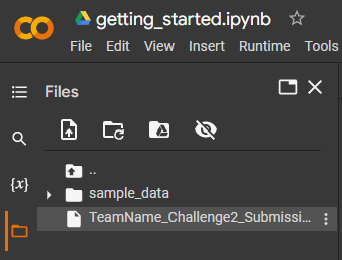

### API Submission


Once you have generated your csv file for submission, you can upload to our api for evaluation using the code shown below. Evaluation is automated and your results will be sent back in the response. The file should be named ‘TeamName_Challenge2_Submission.csv’. Each team can submit once every 10 minutes and their results will be conveyed back to them.

Submission and the leaderboard is automated through an api. To upload please run the code below, with the file name corresponding to your submission csv. Note that submissions can only be made every 20 minutes to prevent teams from submitting large numbers of random permutations of the IDs, so be sure you're ready to submit before executing the following code!


In [ ]:

def submit(submission_df = None):
  '''
  If you don't provide a submission dataframe, the default file name "{team_name}_Challenge2_Submission.csv" will be used.
  Returns a string with your submission value.
  '''
  if submission_df:
    save_submission(submission_df)
  return requests.post(COMPETITION_URL+'/submit', files = {"file": open(f"{team_name}_Challenge2_Submission.csv", "rb")}).content.decode() 
  
print(submit())

{"detail":"Uh Oh! You can only submit a new result 1200.0 secs after the last submision."}


To get your best score so far, run the following code:

In [ ]:
def get_my_best_score():
  return requests.get(COMPETITION_URL+'/score').content.decode()
print("Current best score: ", get_my_best_score())

Current best score:  6.0


# Final Tips
- Before you dive into your implementation, make sure you (i) understand the nature of each dataset and (ii) have thought of some potential strategies that could be used to link them.
- Remember, your goal is to identify customers in the anonymised datasets. **This is achieved by matching *ID*s**. E.g. Your score would remain the same regardless of whether an identified person has 10 transactions or 10,000 transactions in CreditCardTransactions.csv - you only get 1 point for matching *ID_1* to *ID_4*!
- Remember **it is not possible to de-anonymise all the data** - so if you are only matching a subsection of the customers you may still be making good progress!
- Since it is not possible to uniquely link all the datasets you need to **be wary of any duplicates obtained** from *pd.merge()* - These duplicates can significantly hurt your score! Make sure to constantly use *value_counts()* to ensure you are not maintianing duplicates (you should call seperately on each ID). And if any duplicates are found, you can use the *drop_duplicates()* function to remove them. But make sure to avoid excessive dropping (e.g. if ID_1, ID_2, and ID_3 are good matches but ID_4 is a duplicate you shouldn't remove the whole row but just change ID_4 to np.nan).

Good Luck!!